<a href="https://colab.research.google.com/github/thiagohrcosta/ML-DescribeImg/blob/main/ML_DescribeImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, InputLayer
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.image import resize


In [2]:
# Loading data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Data to 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# One-hot format
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [5]:
# Preparing data
train_images_vgg = np.expand_dims(train_images, axis=-1)
train_images_vgg = np.repeat(train_images_vgg, 3, axis=-1)
train_images_vgg = resize(train_images_vgg, [32, 32])

test_images_vgg = np.expand_dims(test_images, axis=-1)
test_images_vgg = np.repeat(test_images_vgg, 3, axis=-1)
test_images_vgg = resize(test_images_vgg, [32, 32])

In [6]:
train_images_custom = np.expand_dims(train_images, axis=-1)
test_images_custom = np.expand_dims(test_images, axis=-1)

In [7]:
# Loading data with weights
vgg16 = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))

In [8]:
model_vgg16 = Sequential()
model_vgg16.add(vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dense(10, activation='softmax'))

In [9]:
# Model compilation
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Model training
history_vgg16 = model_vgg16.fit(train_images_vgg, train_labels, epochs=10, batch_size=32, validation_data=(test_images_vgg, test_labels))
print(history_vgg16)

Epoch 1/10
1875/1875 [==============================] - 67s 31ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 55s 30ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3028 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3028 - accuracy: 0.0959 - val_loss: 2.3026 -

In [11]:
# Network archtecture
model_custom = Sequential([
    InputLayer(input_shape=(28, 28, 1)),
    Flatten(),
    Dense(784, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(10, activation='softmax')
])


In [12]:
# Model compilation
model_custom.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
# Model training
history_custom = model_custom.fit(train_images_custom, train_labels, epochs=10, batch_size=128, validation_data=(test_images_custom, test_labels))


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1553 - accuracy: 0.9402 - val_loss: 0.4070 - val_accuracy: 0.8932
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1341 - accuracy: 0.9477 - val_loss: 0.4526 - val_accuracy: 0.8926
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1295 - accuracy: 0.9485 - val_loss: 0.4776 - val_accuracy: 0.8926
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1308 - accuracy: 0.9493 - val_loss: 0.4620 - val_accuracy: 0.8870
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1292 - accuracy: 0.9499 - val_loss: 0.4765 - val_accuracy: 0.8865
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1256 - accuracy: 0.9507 - val_loss: 0.4512 - val_accuracy: 0.8940
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1327 - accuracy: 0.9517 - val_loss: 0.4756 - val_accuracy: 0.8861
Epoch 

In [14]:
# Model VGG-16
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(test_images_vgg, test_labels, verbose=0)
print(f"VGG-16 - Loss: {loss_vgg16}, Accuracy: {accuracy_vgg16}")

VGG-16 - Loss: 2.3026068210601807, Accuracy: 0.10000000149011612


In [15]:
# Custom Model
loss_custom, accuracy_custom = model_custom.evaluate(test_images_custom, test_labels, verbose=0)
print(f"Custom Model - Loss: {loss_custom}, Accuracy: {accuracy_custom}")

Custom Model - Loss: 0.34056222438812256, Accuracy: 0.879800021648407


In [16]:
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

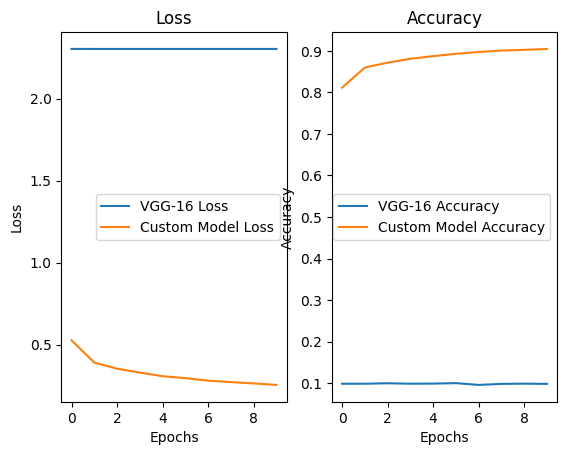

In [17]:
plt.subplot(1, 2, 1)
plt.plot(history_vgg16.history['loss'], label='VGG-16 Loss')
plt.plot(history_custom.history['loss'], label='Custom Model Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg16.history['accuracy'], label='VGG-16 Accuracy')
plt.plot(history_custom.history['accuracy'], label='Custom Model Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# Model Predictions VGG-16
predictions_vgg16 = model_vgg16.predict(test_images_vgg)
predicted_classes_vgg16 = np.argmax(predictions_vgg16, axis=1)

# Custom Model Predictions
predictions_custom = model_custom.predict(test_images_custom)
predicted_classes_custom = np.argmax(predictions_custom, axis=1)

# True labels
true_classes = np.argmax(test_labels, axis=1)

313/313 [==============================] - 1s 3ms/step


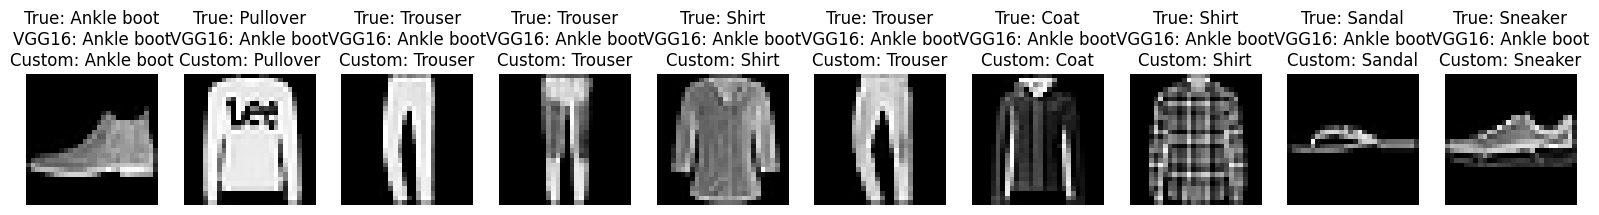

In [19]:
# Classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot Images
def plot_images(images, true_labels, predicted_labels_vgg, predicted_labels_custom, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[true_labels[i]]}\nVGG16: {class_names[predicted_labels_vgg[i]]}\nCustom: {class_names[predicted_labels_custom[i]]}")
        plt.axis('off')

    plt.show()

# Plot Images
plot_images(test_images, true_classes, predicted_classes_vgg16, predicted_classes_custom, class_names)

In [43]:
train_images[4000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23921569, 0.59215686, 0.64313725,
        0.63137255, 0.39607843, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.58823529, 0.94509804, 0.37647059, 0.08235294,
        0.18823529, 0.78431373, 0.80784314, 0.        , 0.        ,
        0.01176471, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.51764706, 0.83529412, 0.        , 0.        , 0.        ,
        0.        , 0.    

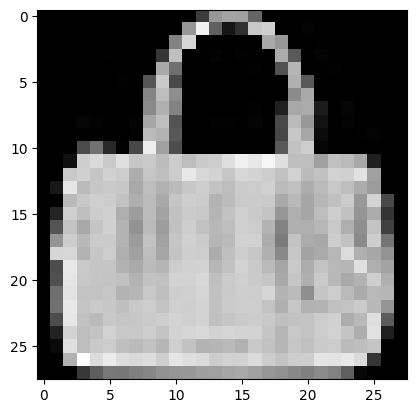

In [46]:
img_1 = train_images[4000]
img_1 = np.array(img_1, dtype='float')
pixels = img_1.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [50]:
vgg16 = VGG16(input_shape=(32, 32, 3), classes = 10, weights=None)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

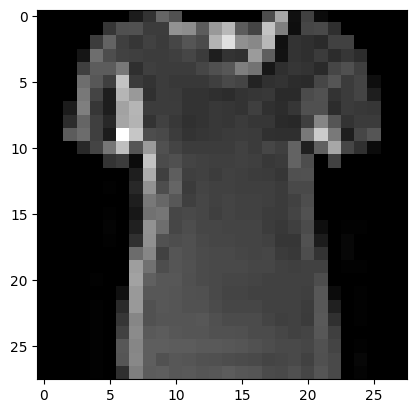

In [51]:
img_1 = test_images[4000]
img_1 = np.array(img_1, dtype='float')
pixels = img_1.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()